In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches


In [117]:
df = pd.read_csv("daily_show_guests.csv")
df["YEAR"] = df["YEAR"].astype(int)


In [118]:
def collapse_group(x):
    if x in ["Acting", "Comedy", "Musician"]:
        return "Acting, Comedy & Music"
    elif x in ["Media", "media"]:
        return "Media"
    elif x in ["Government", "Politician", "Political Aide", "Military"]:
        return "Government and Politics"
    else:
        return None

df["Collapsed_Group"] = df["Group"].apply(collapse_group)


In [119]:
df = df.dropna(subset=["Collapsed_Group"])


In [120]:
counts = (
    df.groupby(["YEAR", "Collapsed_Group"])
      .size()
      .reset_index(name="count")
)

totals = (
    counts.groupby("YEAR")["count"]
          .sum()
          .reset_index(name="total")
)

counts = counts.merge(totals, on="YEAR")
counts["percent"] = counts["count"] / counts["total"] * 100

plot_df = counts.pivot(
    index="YEAR",
    columns="Collapsed_Group",
    values="percent"
)


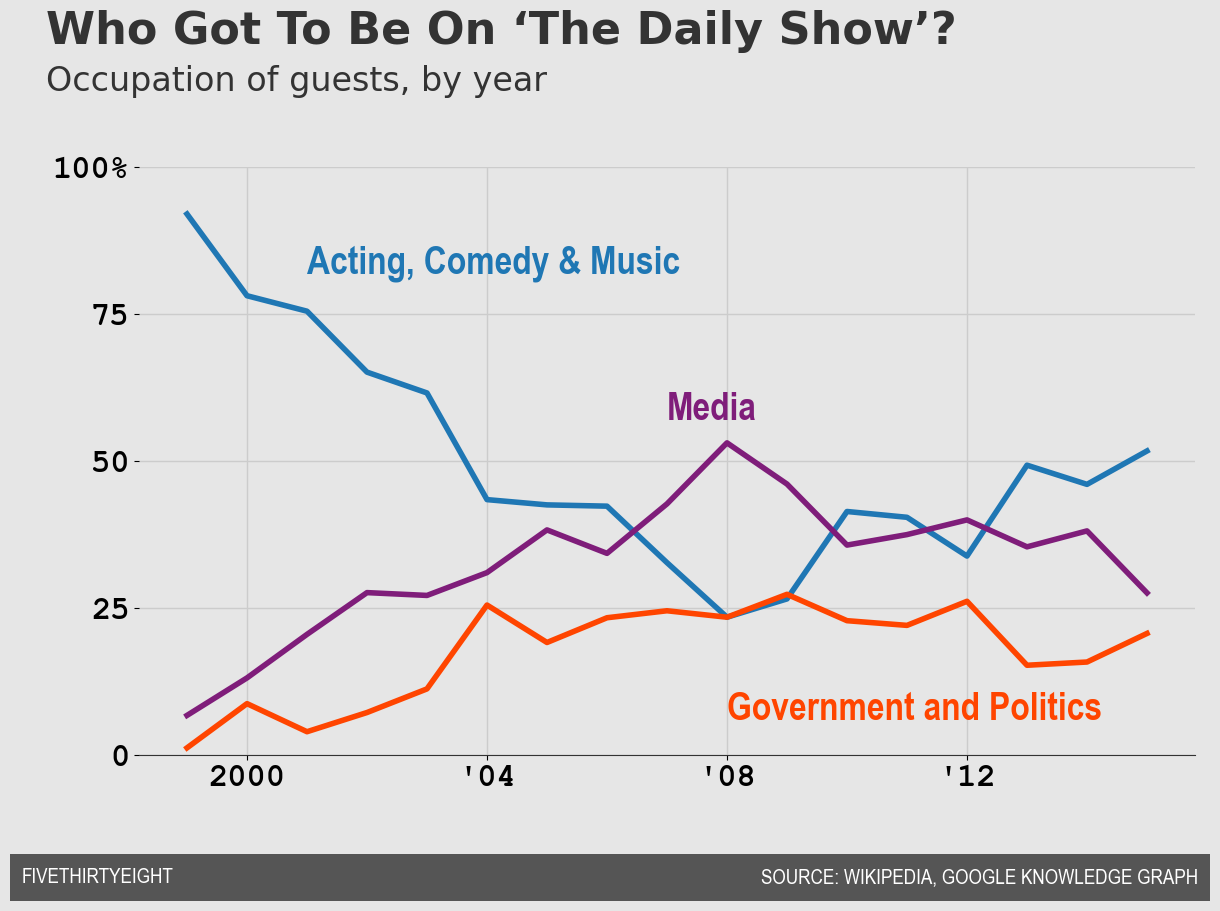

In [122]:
plt.figure(figsize=(12, 9.32), facecolor="#e6e6e6")

colors = {
    "Acting, Comedy & Music": "#1f77b4",
    "Media": "#7f1d7a",
    "Government and Politics": "#ff4500"
}

for group, color in colors.items():
    plt.plot(
        plot_df.index,
        plot_df[group],
        linewidth=4,
        color=color
    )

x_coord = 0.03
main_title_y = 0.92
subtitle_y = 0.87

plt.text(
    x_coord, main_title_y,
    "Who Got To Be On ‘The Daily Show’?",
    transform=plt.gcf().transFigure,
    fontsize=32,
    weight="bold",
    ha="left",
    color="#333333"
)

plt.text(
    x_coord, subtitle_y,
    "Occupation of guests, by year",
    transform=plt.gcf().transFigure,
    fontsize=24,
    ha="left",
    color="#333333"
)

plt.ylim(0, 100)

plt.yticks([0, 25, 50, 75, 100], ["0", "25", "50", "75", "100%"], fontsize=23, fontname="Courier New", weight="bold")

xticks = [2000, 2004, 2008, 2012]
xtick_labels = ["2000", "'04", "'08", "'12"]

plt.xticks(xticks, xtick_labels, fontsize=23, fontname="Courier New", weight="bold")

plt.grid(axis="y", color="#cccccc", linewidth=1)
plt.grid(axis="x", color="#cccccc", linewidth=1)

ax = plt.gca()
ax.set_facecolor("#e6e6e6")

fig = plt.gcf()
rect = patches.Rectangle(
    (0, 0), 1, 0.05,
    transform=fig.transFigure,
    facecolor="#555555",
    zorder=0
)
fig.patches.append(rect)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_color("#333333")

plt.xlabel("")

plt.text(2001, 82, "Acting, Comedy & Music", color=colors["Acting, Comedy & Music"], fontsize=28, weight="bold", fontname="Arial Narrow")
plt.text(2007, 57, "Media", color=colors["Media"], fontsize=28, weight="bold", fontname="Arial Narrow")
plt.text(2008, 6, "Government and Politics", color=colors["Government and Politics"], fontsize=28, weight="bold", fontname="Arial Narrow")

plt.figtext(0.01, 0.02, "FIVETHIRTYEIGHT", fontsize=15, color="white", fontname="Arial Narrow")
plt.figtext(0.99, 0.02, "SOURCE: WIKIPEDIA, GOOGLE KNOWLEDGE GRAPH", fontsize=15, color="white", ha="right", fontname="Arial Narrow")

plt.tight_layout(rect=[0, 0.1, 1, 0.88])
plt.show()
